In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils

In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session = fastf1.get_session(2024, 'Las Vegas Grand Prix', 'FP2')
session.load()
# In this way i Can exclude the box laps
laps = session.laps.pick_wo_box()

# Pick just the accurate laps
laps = laps[laps['IsAccurate']==True]

circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (2.84 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']


In [3]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:20:27.205000,VER,1,0 days 00:01:54.872000,2.0,1.0,NaT,NaT,0 days 00:00:29.925000,0 days 00:00:39.804000,...,True,Red Bull Racing,0 days 00:18:32.333000,2024-11-22 06:03:47.953,1,NaN,False,,False,True
2,0 days 00:22:04.308000,VER,1,0 days 00:01:37.103000,3.0,1.0,NaT,NaT,0 days 00:00:27.879000,0 days 00:00:32.341000,...,True,Red Bull Racing,0 days 00:20:27.205000,2024-11-22 06:05:42.825,1,NaN,False,,False,True
3,0 days 00:24:11.386000,VER,1,0 days 00:02:07.078000,4.0,1.0,NaT,NaT,0 days 00:00:35.909000,0 days 00:00:45.582000,...,True,Red Bull Racing,0 days 00:22:04.308000,2024-11-22 06:07:19.928,12,NaN,False,,False,True
4,0 days 00:25:47.726000,VER,1,0 days 00:01:36.340000,5.0,1.0,NaT,NaT,0 days 00:00:27.421000,0 days 00:00:32.261000,...,True,Red Bull Racing,0 days 00:24:11.386000,2024-11-22 06:09:27.006,1,NaN,False,,False,True
5,0 days 00:27:47.527000,VER,1,0 days 00:01:59.801000,6.0,1.0,NaT,NaT,0 days 00:00:39.917000,0 days 00:00:38.930000,...,True,Red Bull Racing,0 days 00:25:47.726000,2024-11-22 06:11:03.346,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0 days 01:06:31.951000,PIA,81,0 days 00:01:38.347000,19.0,3.0,NaT,NaT,0 days 00:00:28.051000,0 days 00:00:33.045000,...,False,McLaren,0 days 01:04:53.604000,2024-11-22 06:50:09.224,1,NaN,False,,False,True
495,0 days 01:08:10.604000,PIA,81,0 days 00:01:38.653000,20.0,3.0,NaT,NaT,0 days 00:00:28.020000,0 days 00:00:33.063000,...,False,McLaren,0 days 01:06:31.951000,2024-11-22 06:51:47.571,1,NaN,False,,False,True
496,0 days 01:09:50.010000,PIA,81,0 days 00:01:39.406000,21.0,3.0,NaT,NaT,0 days 00:00:28.326000,0 days 00:00:33.541000,...,False,McLaren,0 days 01:08:10.604000,2024-11-22 06:53:26.224,1,NaN,False,,False,True
497,0 days 01:11:29.583000,PIA,81,0 days 00:01:39.573000,22.0,3.0,NaT,NaT,0 days 00:00:28.238000,0 days 00:00:33.718000,...,False,McLaren,0 days 01:09:50.010000,2024-11-22 06:55:05.630,1,NaN,False,,False,True


In [4]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
colors = {
    "SAI": "red", "LEC": "red", "NOR": "orange", "PIA": "orange", "PER": "blue",
    "ALO": "green", "RUS": "grey", "STR": "green", "TSU": "#9932CC", "BOT": "lime",
    "OCO": "pink", "HUL": "olive", "MAG": "olive", "RIC": "#9932CC", "ALB": "navy",
    "ZHO": "lime", "GAS": "pink", "HAM": "grey", "VER": "blue", 'SAR':"navy", 'DEV': "#9932CC", 
    'BEA': "olive", 'LAW':  "#9932CC", 'MSC': "olive", 'LAT': "navy", 'VET' : "green", 'COL':"navy"
}

In [8]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

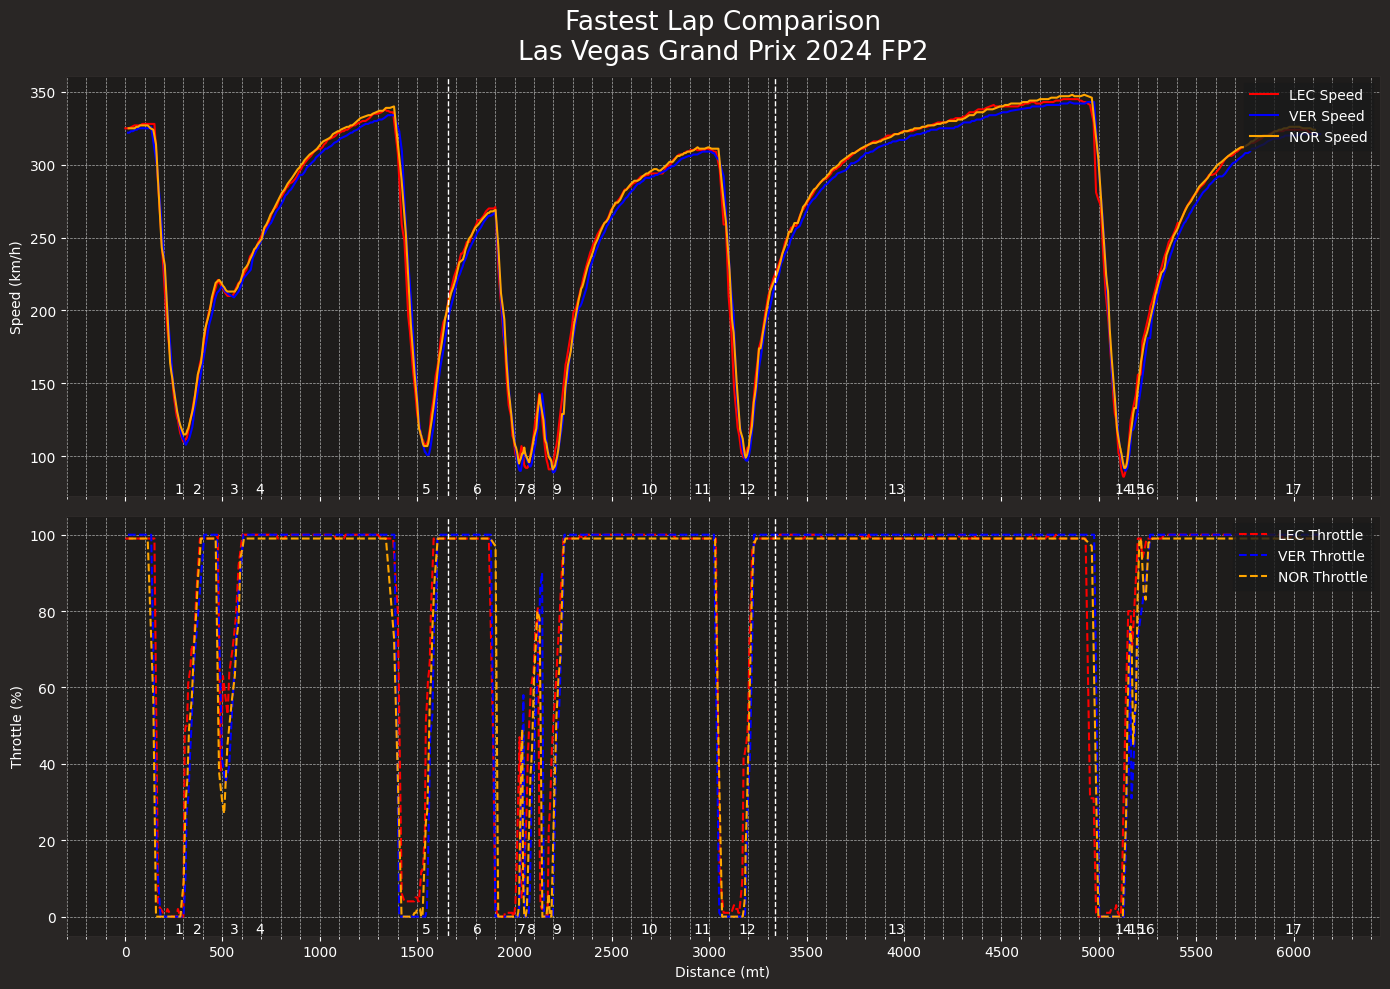

In [9]:
# Extract fastest laps for LEC and SAI
LEC_FASTEST_LAP = transformed_laps.pick_drivers('LEC').pick_fastest()
NOR_FASTEST_LAP = transformed_laps.pick_drivers('NOR').pick_fastest()
VER_FASTEST_LAP = transformed_laps.pick_drivers('VER').pick_fastest()

# Get telemetry data and add distance
LEC_tel = LEC_FASTEST_LAP.get_car_data().add_distance()
NOR_tel = NOR_FASTEST_LAP.get_car_data().add_distance()
VER_tel = VER_FASTEST_LAP.get_car_data().add_distance()

#interpolating
LEC_tel = interpolate_dataframe(LEC_tel)
VER_tel = interpolate_dataframe(VER_tel)
NOR_tel = interpolate_dataframe(NOR_tel)
# Length of the track
length_circuit = LEC_tel['Distance'].max()

# Get sector times for the fastest lap
LEC_sector_times = [
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector1Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector2Time']),
    timedelta_to_seconds(LEC_FASTEST_LAP['Sector3Time'])
]

# Calculate total lap time
total_lap_time = sum(LEC_sector_times)

# Calculate sector end distances
sector1_end_distance = LEC_tel[LEC_tel['Time'] <= LEC_FASTEST_LAP['Sector1Time']]['Distance'].max()
sector2_end_distance = LEC_tel[LEC_tel['Time'] <= (LEC_FASTEST_LAP['Sector1Time'] + LEC_FASTEST_LAP['Sector2Time'])]['Distance'].max()

# Extract the 'Distance' column from the corners DataFrame
corner_distances = circuit_info.corners['Distance']
# Generate corner numbers based on the number of corners
corner_numbers = range(1, len(corner_distances) + 1)  # Generates sequential numbers from 1 to the number of corners


# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Apply a dark background
plt.style.use('dark_background')

# Plot Speed on the first subplot
ax1.plot(LEC_tel['Distance'], LEC_tel['Speed'], color='red', label='LEC Speed')
ax1.plot(VER_tel['Distance'], VER_tel['Speed'], color='blue', label='VER Speed')
ax1.plot(NOR_tel['Distance'], NOR_tel['Speed'], color='orange', label='NOR Speed')
ax1.set_ylabel('Speed (km/h)', color='white')
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')
ax1.grid(which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='upper right')
ax1.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} FP2", color='white')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax1
for corner, number in zip(corner_distances, corner_numbers):
    ax1.text(corner, ax1.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')
# Plot Throttle on the second subplot
ax2.plot(LEC_tel['Distance'], LEC_tel['Throttle'], color='red', linestyle='--', label='LEC Throttle')
ax2.plot(VER_tel['Distance'], VER_tel['Throttle'], color='blue', linestyle='--', label='VER Throttle')
ax2.plot(NOR_tel['Distance'], NOR_tel['Throttle'], color='orange', linestyle='--', label='NOR Throttle')
ax2.set_xlabel('Distance (mt)', color='white')
ax2.set_ylabel('Throttle (%)', color='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
ax2.grid(which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='upper right')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Annotate with corner numbers on ax2
for corner, number in zip(corner_distances, corner_numbers):
    ax2.text(corner, ax2.get_ylim()[0], str(number), color='white', fontsize=10, verticalalignment='bottom', horizontalalignment='center')


# Add custom vertical dashed lines for sectors to both subplots
for ax in [ax1, ax2]:
    ax.axvline(x=sector1_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 1')
    ax.axvline(x=sector2_end_distance, color='white', linestyle='--', linewidth=1, label='End of Sector 2')

# Adjust layout
plt.tight_layout()
plt.show()


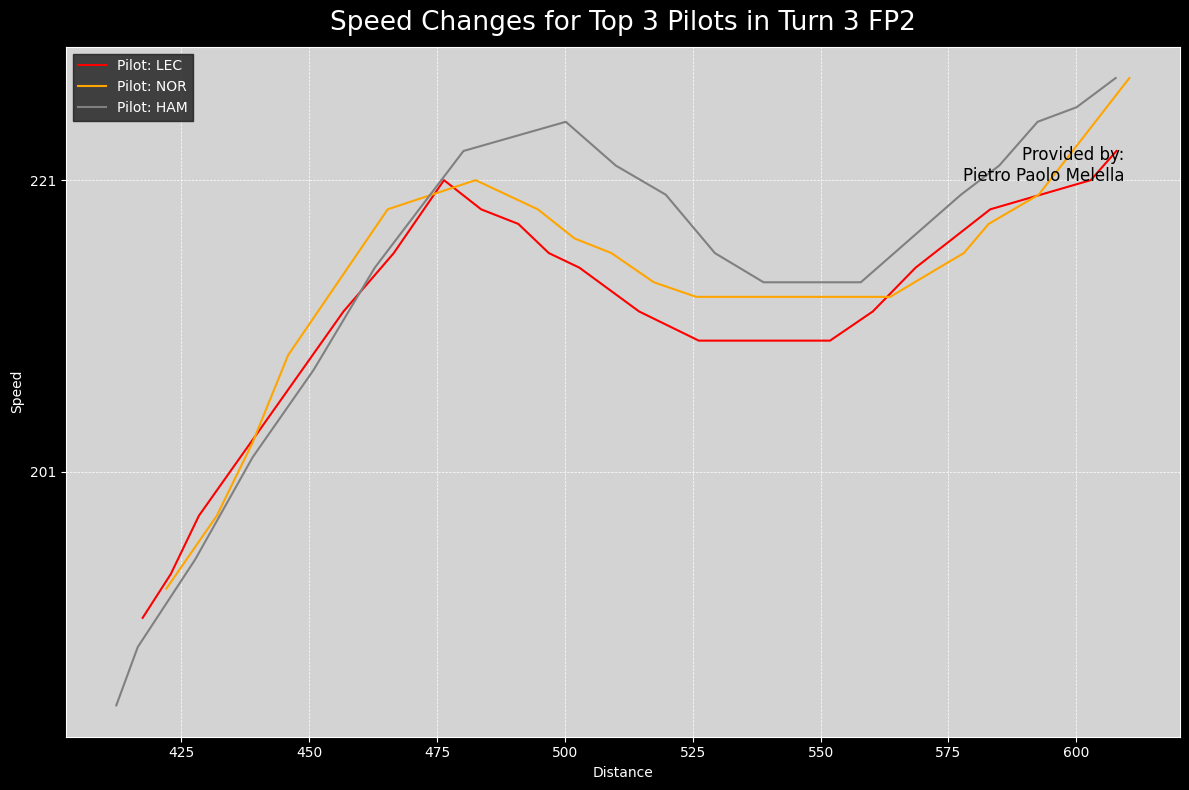

In [10]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

drivers_4 =['LEC', 'NOR', 'HAM']

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    #selecting the data starting for a particular turn
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[2]-150)) & 
    (pilot_car_data['Distance'] < corner_distances[2]+50)]
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 3 Pilots in Turn 3 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_13_14['Speed'].max(), 200)) + 1, int(max(pilot_car_data_13_14['Speed'].max(), 200)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

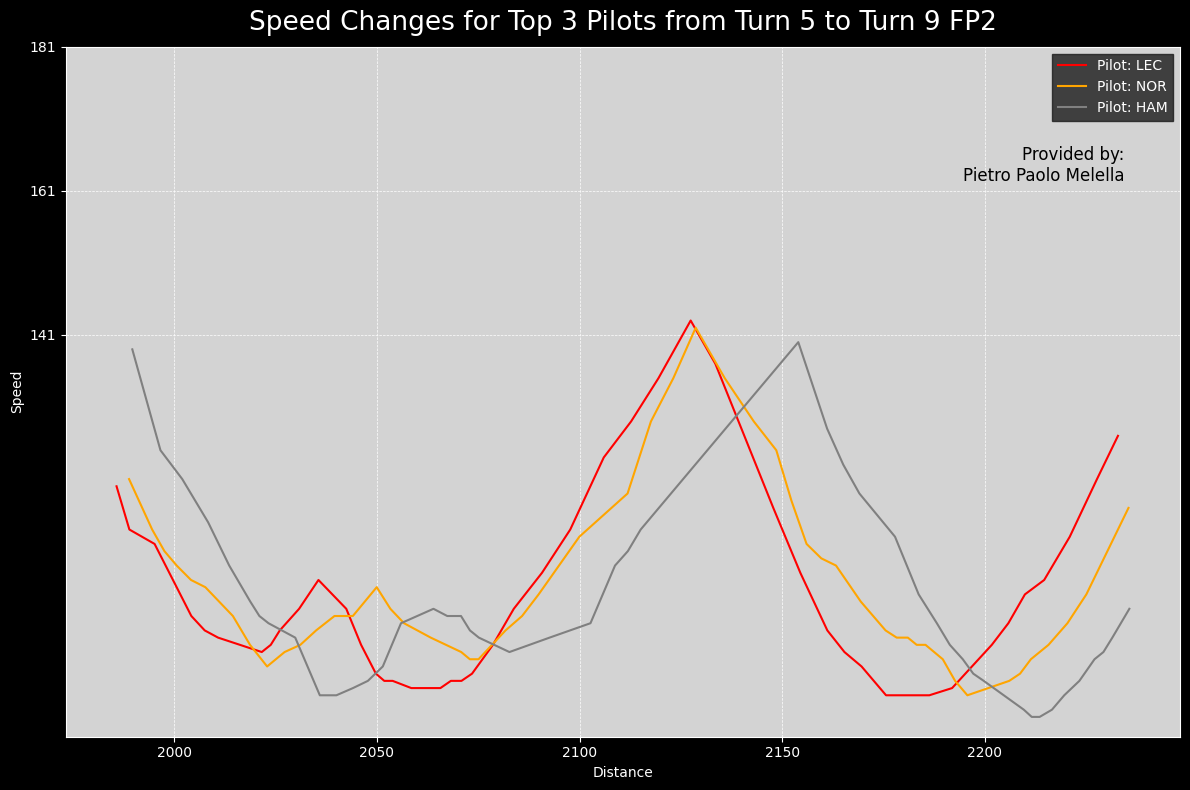

In [11]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))

# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')


# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    #pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    #getting car data and adding distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()
    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    #selecting the data starting for a particular turn
    pilot_car_data_13_14 = pilot_car_data[
    (pilot_car_data['Distance'] > (corner_distances[6]-50)) & 
    (pilot_car_data['Distance'] < corner_distances[8]+20)]
    
    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_13_14['Distance'], pilot_car_data_13_14['Speed'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")
    
# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Speed Changes for Top 3 Pilots from Turn 5 to Turn 9 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Set y-axis ticks at intervals of 20
plt.yticks(range(int(min(pilot_car_data_13_14['Speed'].max(), 200)) + 1, int(max(pilot_car_data_13_14['Speed'].max(), 200)), 20))

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

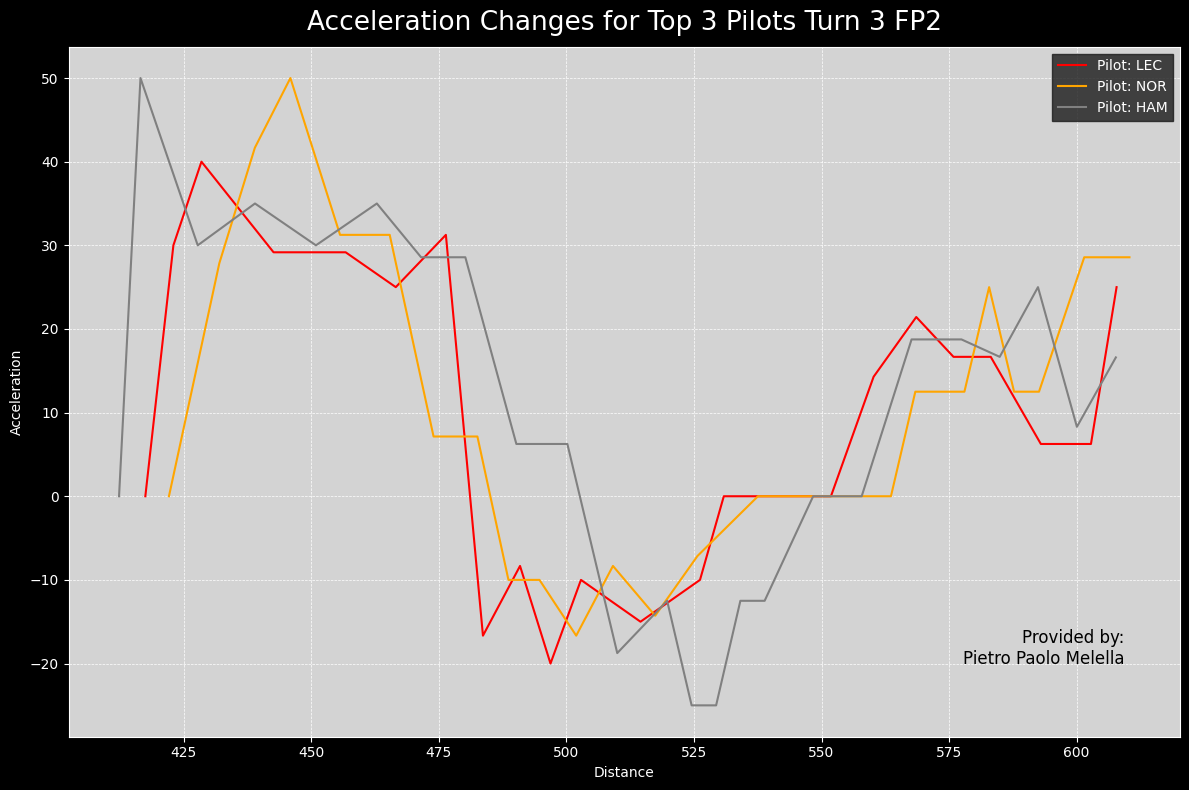

In [12]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[2]-150)) & 
        (pilot_car_data['Distance'] < corner_distances[2]+50)
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots Turn 3 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

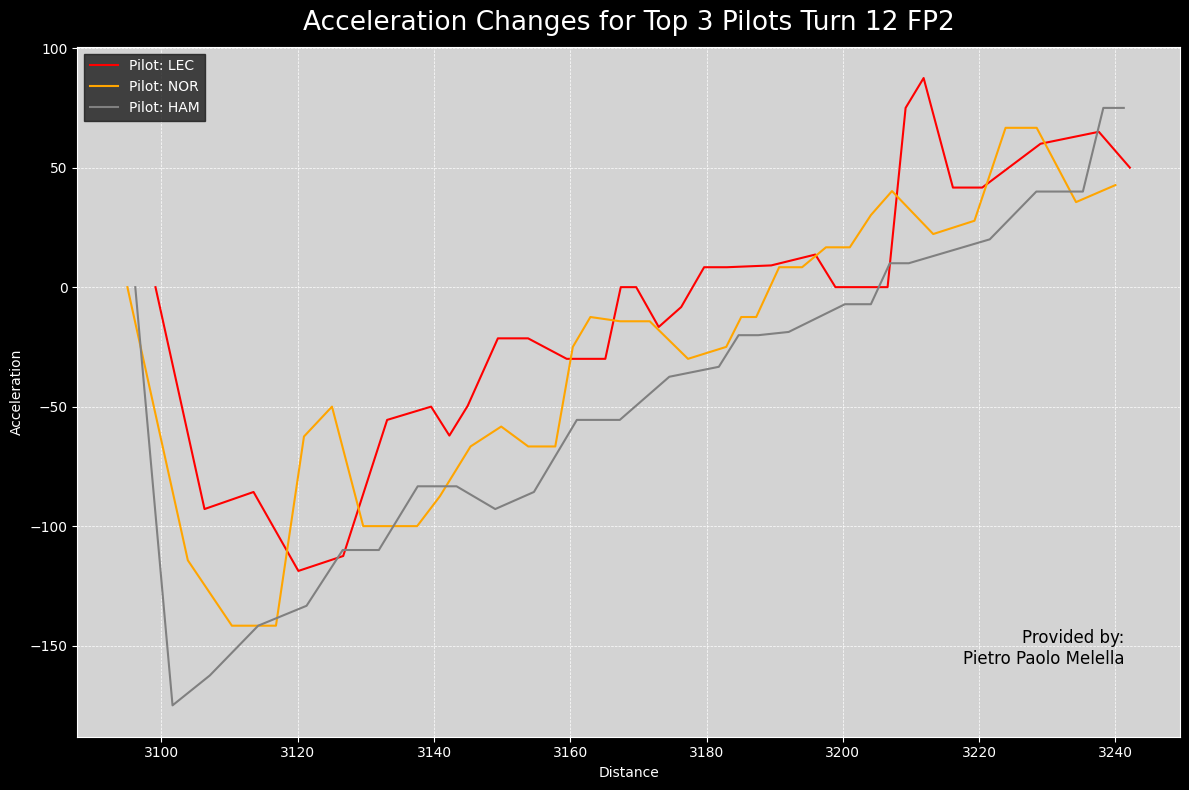

In [13]:
# Initialize a figure for the plot
plt.figure(figsize=(12, 8))
# Set the background color of the plot (axes area)
plt.gca().set_facecolor('lightgray')

# Loop through each driver and plot their speed changes
for pilot in drivers_4:
    # Pick the fastest lap for each pilot
    fastest_laps_for_pilot = transformed_laps.pick_drivers(pilot).pick_fastest()
    
    # Get car data and add distance
    pilot_car_data = fastest_laps_for_pilot.get_car_data().add_distance()

    #interpolating
    pilot_car_data = interpolate_dataframe(pilot_car_data)
    
    # Selecting the data starting for turn 6
    pilot_car_data_turn_6 = pilot_car_data[
        (pilot_car_data['Distance'] > (corner_distances[11]-100)) & 
        (pilot_car_data['Distance'] < corner_distances[11]+50)
    ].copy()  # Ensure it's a copy to avoid SettingWithCopyWarning

    # Calculate acceleration
    pilot_car_data_turn_6.loc[:, 'Acceleration'] = (
        (pilot_car_data_turn_6['Speed'].diff().fillna(0)) /
        pilot_car_data_turn_6['SessionTime'].dt.total_seconds().diff().fillna(0)
    ).fillna(0)

    # Filter rows where throttle is less than 101 and reset index
    pilot_car_data_turn_6_throttle_99 = pilot_car_data_turn_6[
        pilot_car_data_turn_6['Throttle'] < 101
    ].reset_index()

    # Plot the speed vs. distance for the current pilot, using the color from the 'colors' dictionary
    plt.plot(pilot_car_data_turn_6_throttle_99['Distance'], 
             pilot_car_data_turn_6_throttle_99['Acceleration'], 
             color=colors.get(pilot, 'black'),  # Use pilot-specific color or default to 'black' if not found
             label=f"Pilot: {pilot}")

# Add a signature in the lower-right corner with a newline
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='Black', fontsize=12
)

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Acceleration')
plt.title('Acceleration Changes for Top 3 Pilots Turn 12 FP2')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [14]:
# With thus code, i filter all the lap time by a median, with a trashhold. Maybe it could change for different track
race_pace = transformed_laps[(transformed_laps['LapTime (s)'] > (transformed_laps['LapTime (s)'].median() - 4)) & (transformed_laps['LapTime (s)'] < (transformed_laps['LapTime (s)'].median() + 4))]

In [15]:
#The goal here is try to take the clean lap times, and for this reason we use the median, it's mostly likely the pilot will do clean laps and some bad laps(traffic and so on)

# Group by 'Driver' and apply the filter for each driver's LapTime
race_pace_filtered = []

# Iterate through each driver in the grouped dataframe
for driver, data in race_pace.groupby('Driver'):
    # Calculate median for LapTime (s) for each driver
    median_lap_time = data['LapTime (s)'].median()

    # Apply the filter for LapTime within the specified range
    filtered_driver_data = data[(data['LapTime (s)'] > (median_lap_time - 1.5)) &
                                (data['LapTime (s)'] < (median_lap_time + 1.5))]

    # Append the filtered data to the list
    race_pace_filtered.append(filtered_driver_data)

# Combine all filtered dataframes into one
race_pace_filtered_df = pd.concat(race_pace_filtered)

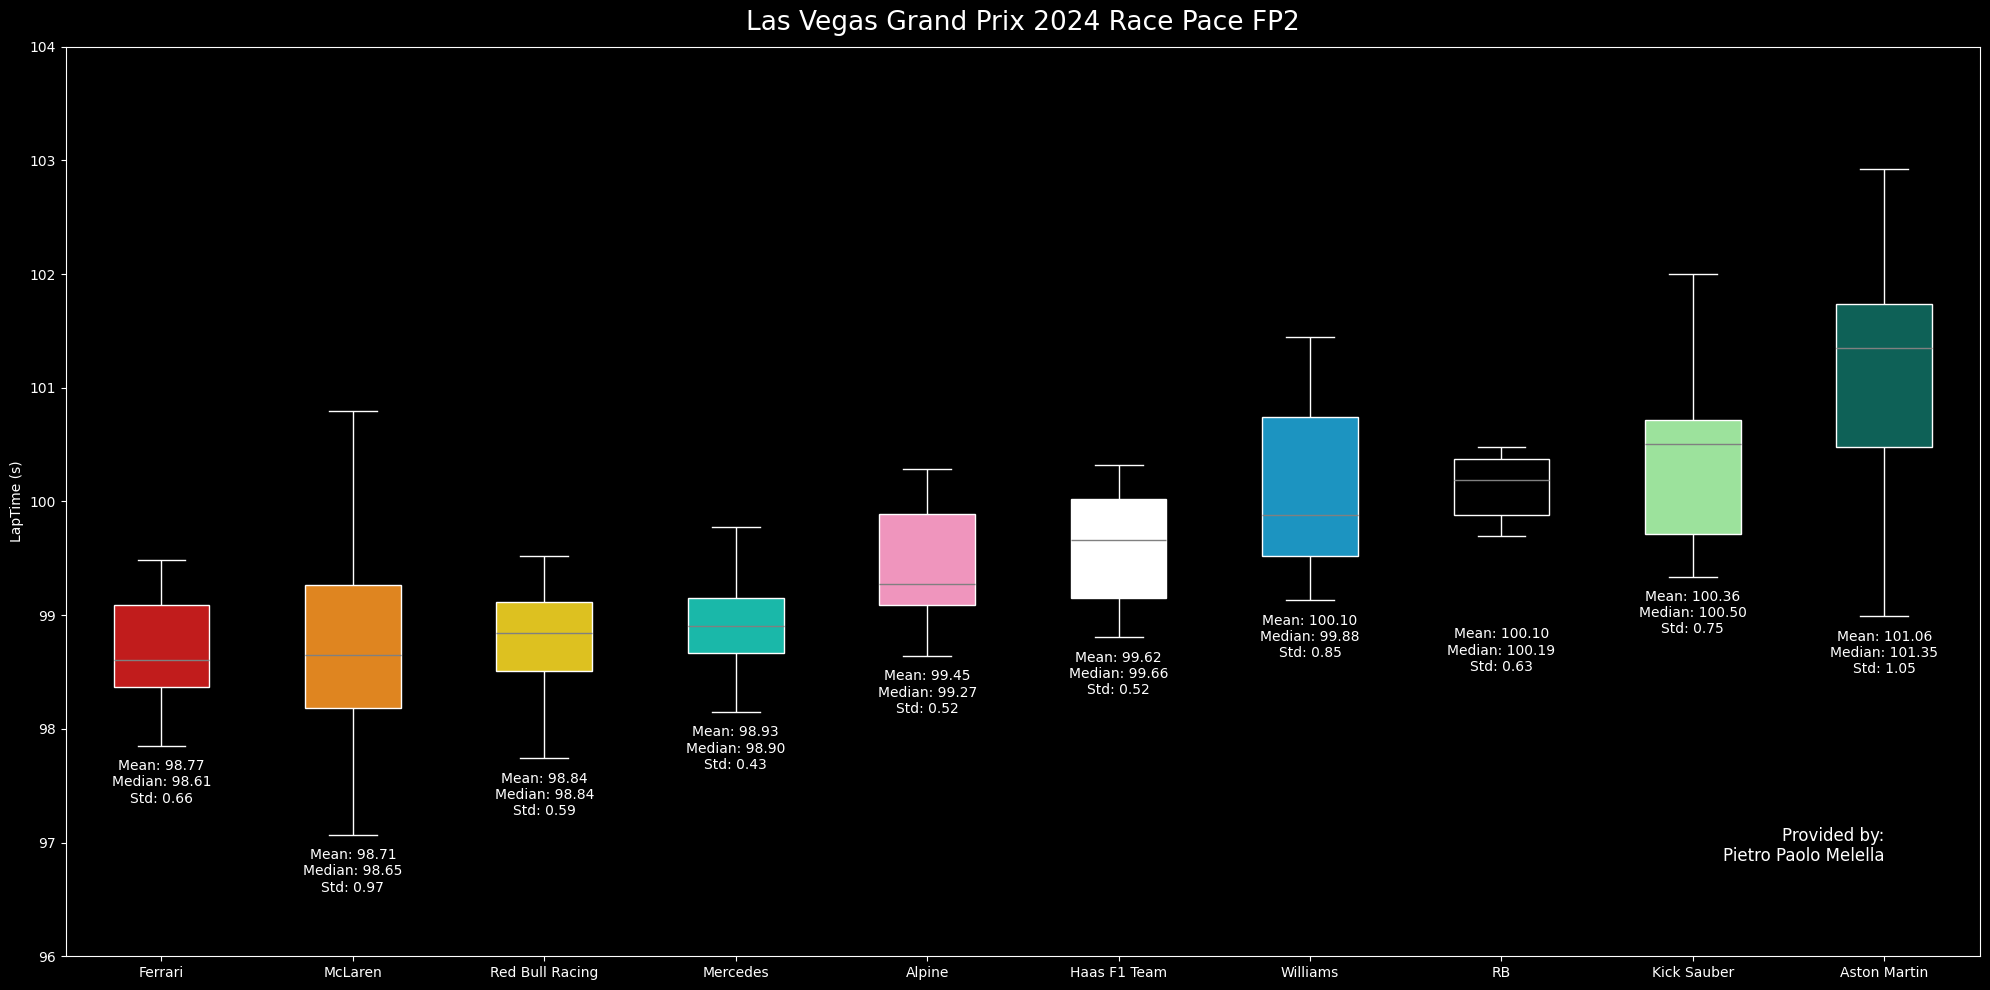

In [16]:
# First, calculate the mean and median times for each team
race_pace_filtered_df.reset_index(drop=True, inplace=True)

team_stats = race_pace_filtered_df.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

team_order = team_stats['median'].sort_values().index

# Create the boxplot
fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
box_plot = sns.boxplot(
    data=race_pace_filtered_df,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Loop through the teams and add mean, median, and std text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker
    
    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']
    std_time = race_pace_filtered_df[race_pace_filtered_df['Team'] == team]['LapTime (s)'].std()  # Calculate std
    
    # Place the text below the whisker (min value in this case)
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}\nStd: {std_time:.2f}', 
        horizontalalignment='center', color='white', fontsize=10
    )

# Add the title and grid properties
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace FP2")
plt.grid(visible=False)

# Add credit text
plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Remove the x-label
ax.set(xlabel=None)
# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(96, 104)  # Example range, adjust based on your data

plt.tight_layout()
plt.show()

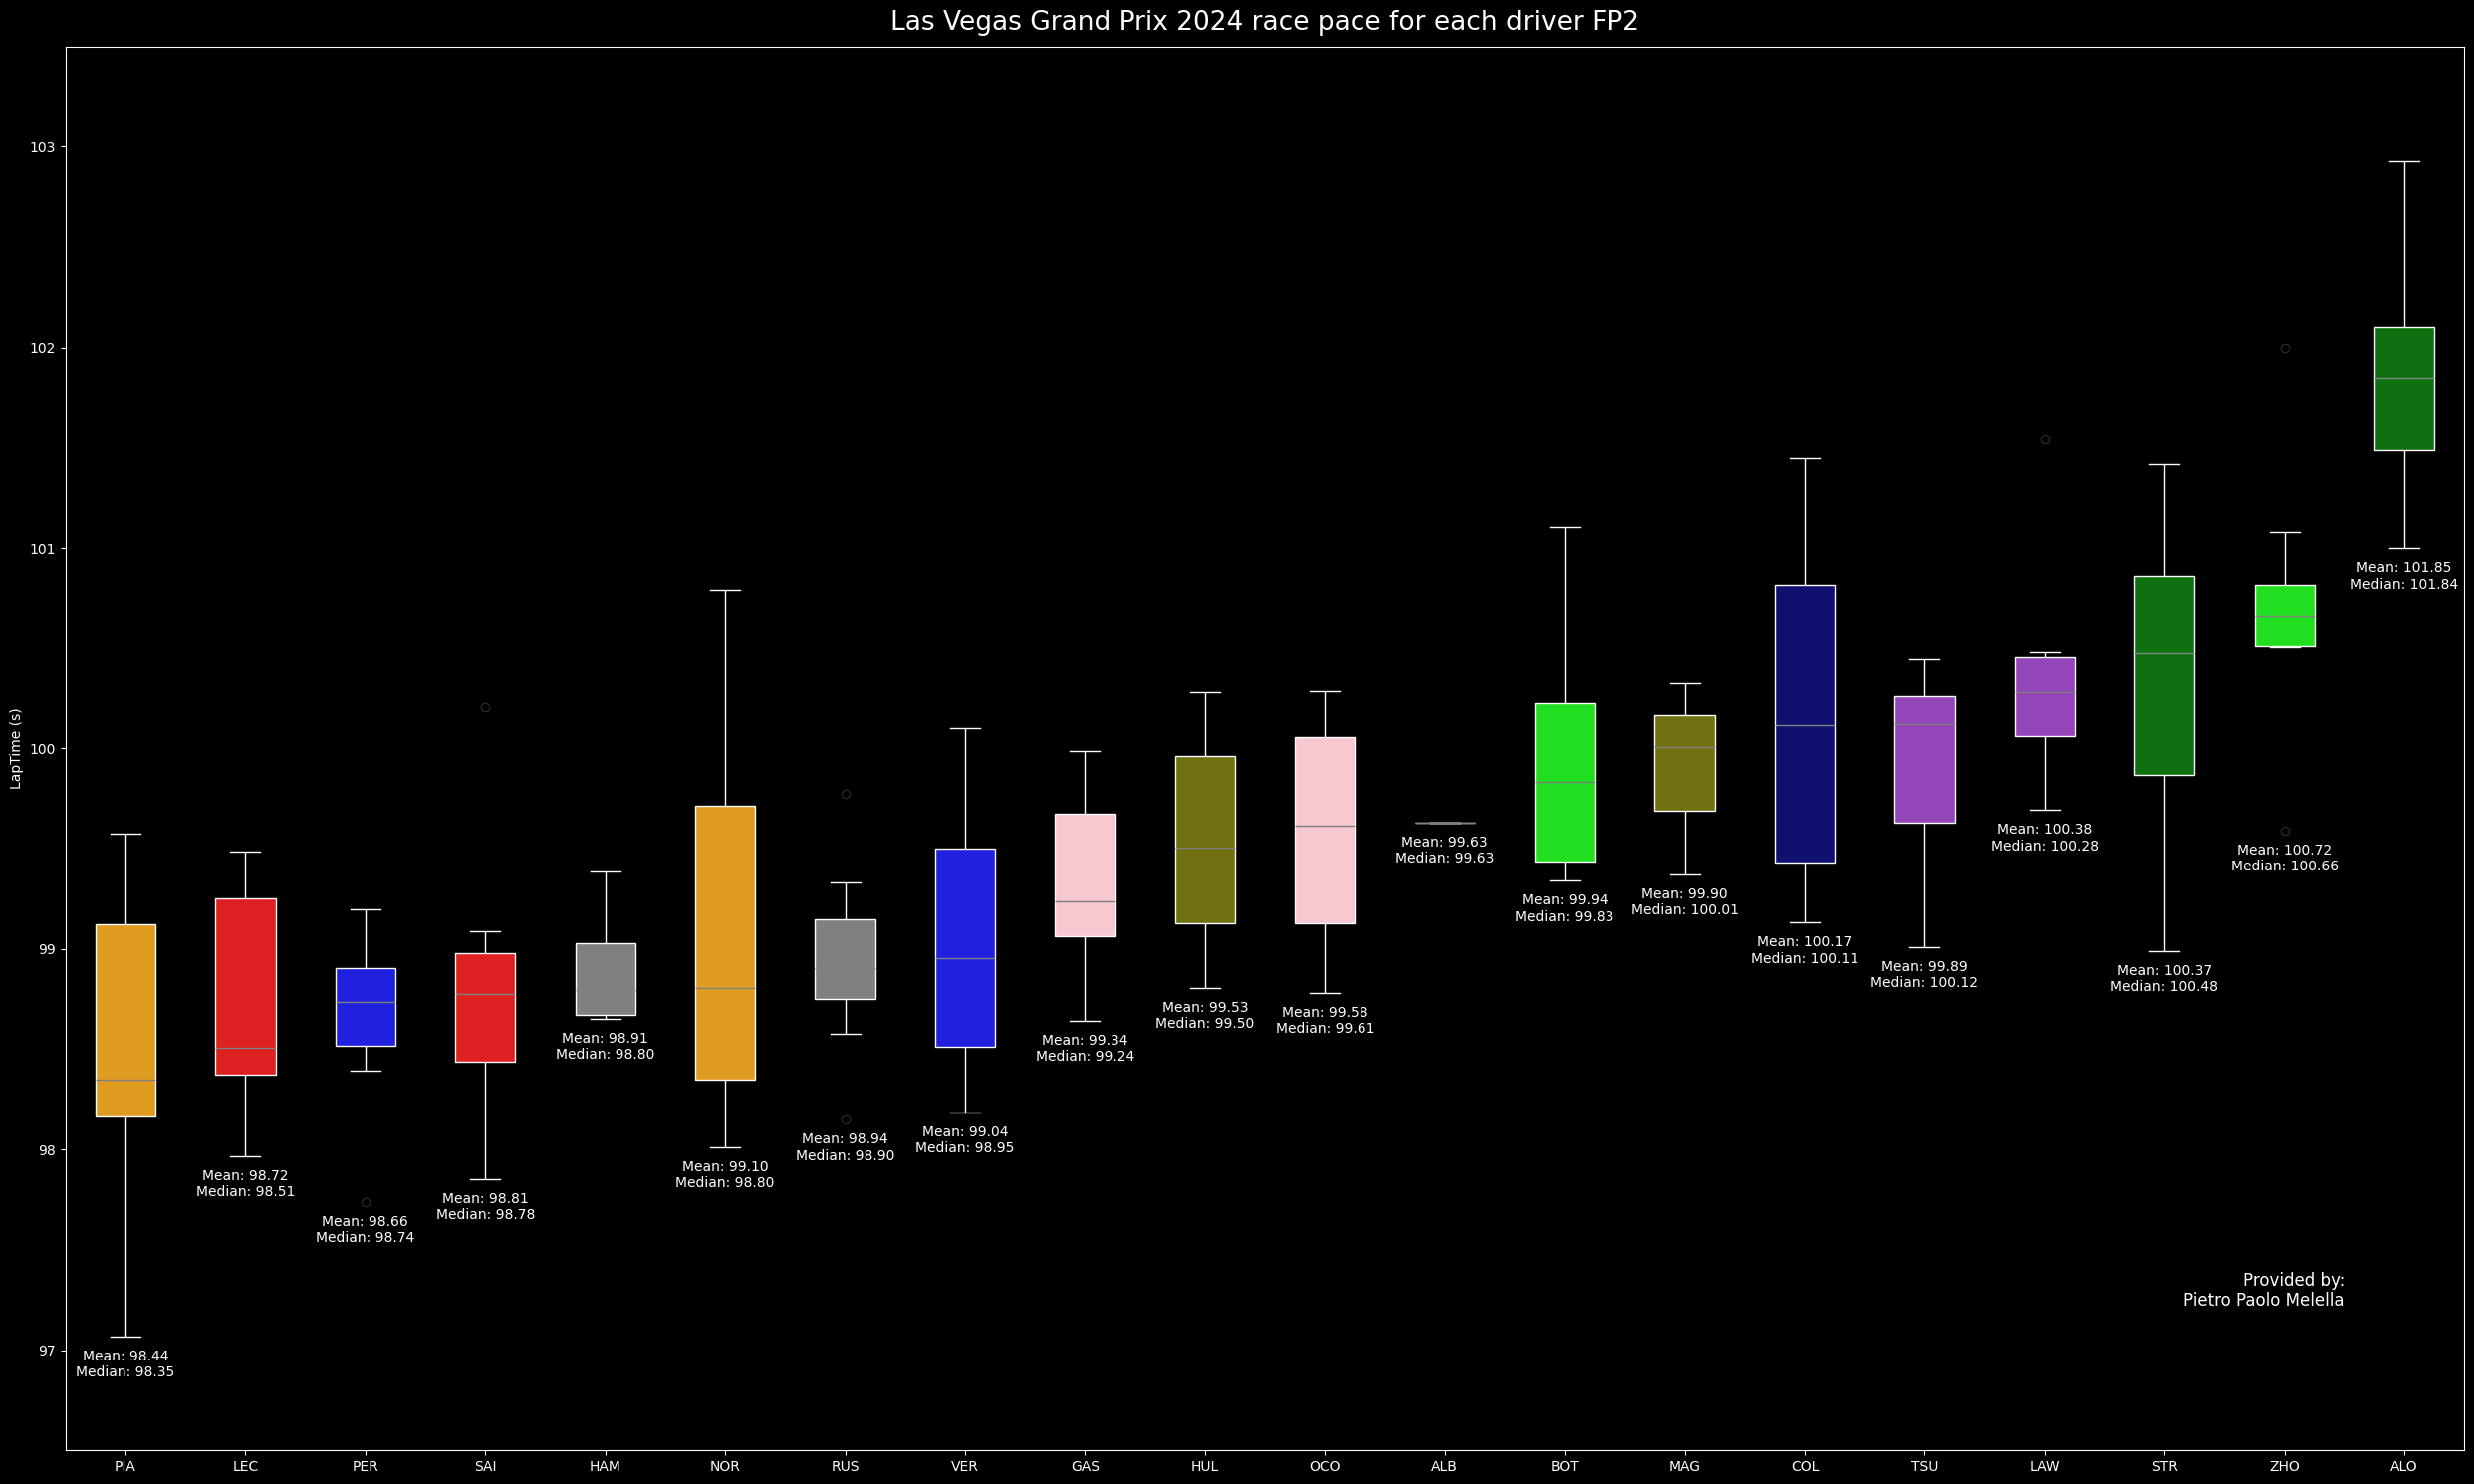

In [17]:
drivers_stats = race_pace_filtered_df.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=race_pace_filtered_df,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)

# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.2,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

plt.title(f"{session.event['EventName']} {session.event.year} race pace for each driver FP2")
plt.grid(visible=False)

plt.text(
    0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# x-label is redundant
ax.set(xlabel=None)
ax.set_ylim(96.5,103.5)
plt.tight_layout()
plt.show()

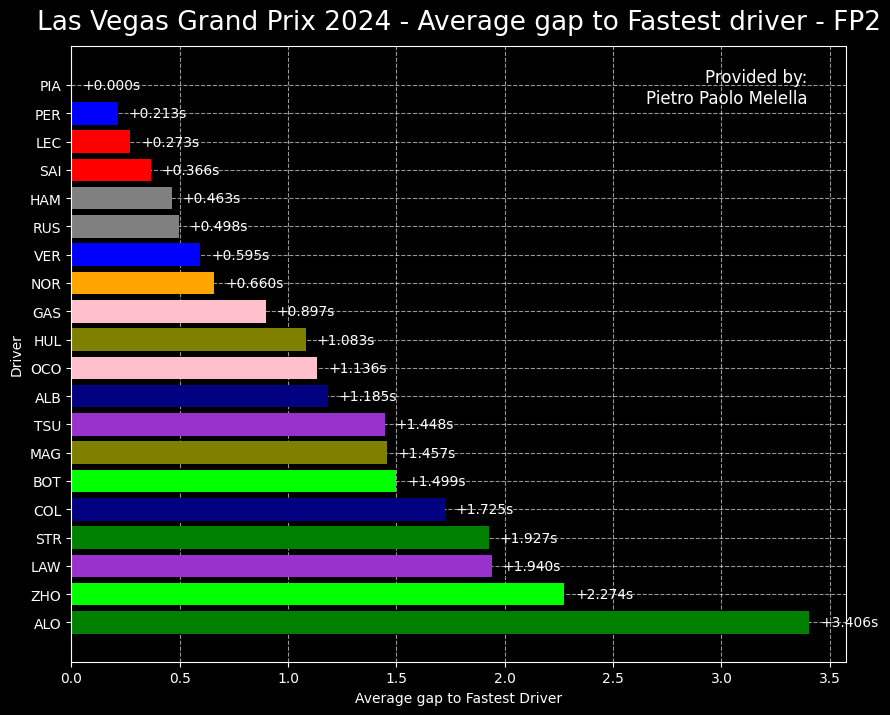

In [18]:
mean_lap_times = race_pace_filtered_df.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver - FP2")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s', 
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

In [31]:
import os
os.chdir('/Users/PietroPaolo/Desktop/GitHub/F1/')
print("Current directory:", os.getcwd())  # Should now print `/Users/PietroPaolo/Desktop/GitHub/F1/`

Current directory: /Users/PietroPaolo/Desktop/GitHub/F1


In [32]:
import sys
import import_ipynb

# Add the parent directory to the Python module search path
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')

# Import the RacePaceAnalyzer class from the notebook
from model_prediction_race_pace import RacePaceAnalyzer

core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Usi

Transformed laps for Bahrain Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 38
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 38)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 21 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '38', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_dat

Transformed laps for Saudi Arabian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Japanese Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core  

Transformed laps for Australian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 63
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 1)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 10)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 11)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 14)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 2)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core       

Transformed laps for Japanese Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Canadian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Emilia Romagna Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Canadian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for British Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Spanish Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for British Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Hungarian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Belgian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Dutch Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Italian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '3', '31', '4', '43', '44', '55', '63', '77', '81']
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core           INFO 	Loading data for Mexico City Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Singapore Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req        

Transformed laps for Mexican Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '4', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Transformed laps for Las Vegas Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '4', '43', '44', '55', '61', '63', '77', '81']


Transformed laps for Abu Dhabi Grand Prix FP2 loaded successfully.
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.92      1.00      0.96        36

    accuracy                           0.95        60
   macro avg       0.96      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60

Model saved to race_pace_model.pkl and scaler to race_pace_scaler.pkl


In [39]:
# Example: Analyze event data
# Initialize the analyzer
analyzer = RacePaceAnalyzer()

# Load the saved model and scaler
analyzer.load_model(
    model_path='/Users/PietroPaolo/Desktop/GitHub/F1/race_pace_model.pkl',
    scaler_path='/Users/PietroPaolo/Desktop/GitHub/F1/race_pace_scaler.pkl'
)

race_pace_laps = analyzer.get_race_pace_laps(transformed_laps)

# Print the results
display(race_pace_laps.pick_drivers('SAI'))

Model and scaler loaded successfully.


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s),LapTimeDifference,Consistency,is_race_pace
84,0 days 01:03:40.694000,SAI,55,0 days 00:01:39.089000,20.0,3.0,NaT,NaT,0 days 00:00:28.342000,0 days 00:00:33.216000,...,12,NaN,False,,False,True,99.089,0.223,0,1
85,0 days 01:05:19.560000,SAI,55,0 days 00:01:38.866000,21.0,3.0,NaT,NaT,0 days 00:00:28.017000,0 days 00:00:33.088000,...,1,NaN,False,,False,True,98.866,0.498,1,1
86,0 days 01:06:57.928000,SAI,55,0 days 00:01:38.368000,22.0,3.0,NaT,NaT,0 days 00:00:27.926000,0 days 00:00:33.057000,...,1,NaN,False,,False,True,98.368,0.409,1,1
87,0 days 01:08:36.705000,SAI,55,0 days 00:01:38.777000,23.0,3.0,NaT,NaT,0 days 00:00:28.181000,0 days 00:00:33.414000,...,1,NaN,False,,False,True,98.777,0.925,1,1
